In [18]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# 📂 Load dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# 🔍 Basic information
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Dataset shape: (150, 6)

Column names: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

Missing values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data types:
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [4]:
# 🧮 Summary statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# 🎯 Check class distribution
print(df['Species'].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


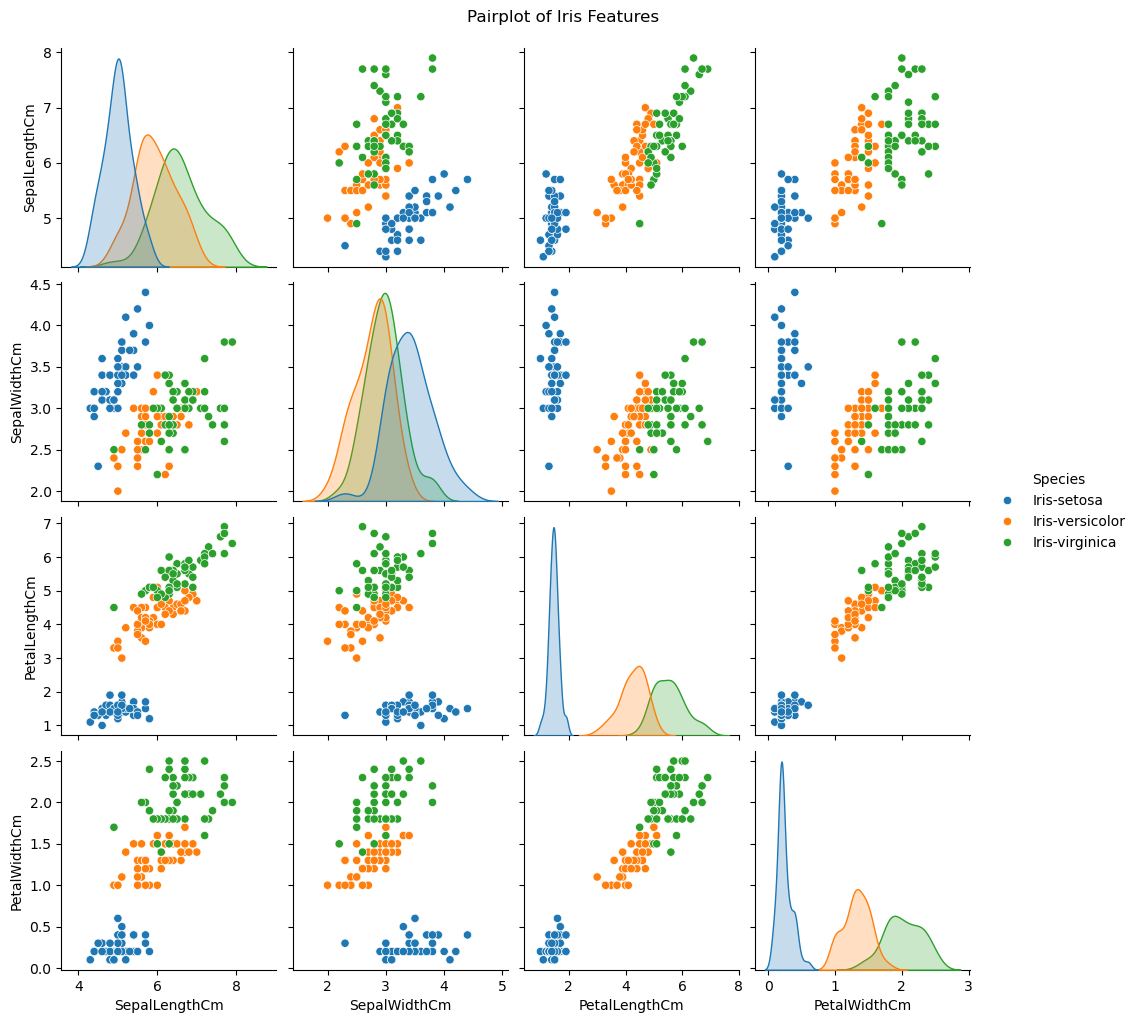

In [6]:
# 📊 Visualize distributions of features
sns.pairplot(df.drop(columns=['Id']), hue='Species', diag_kind='kde')
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()

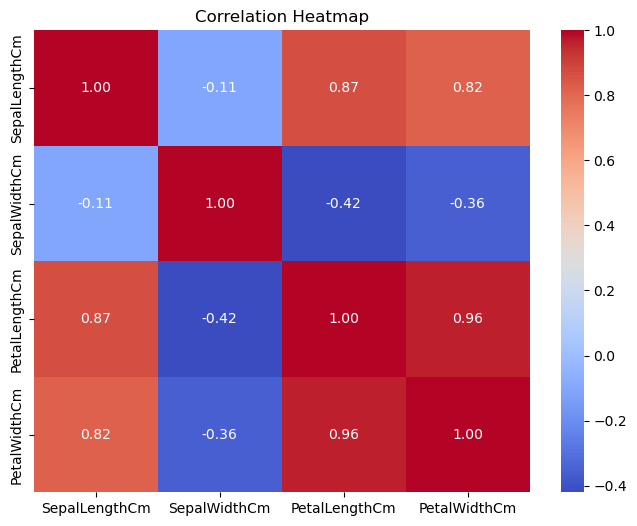

In [8]:
# 📈 Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=['Id', 'Species']).corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

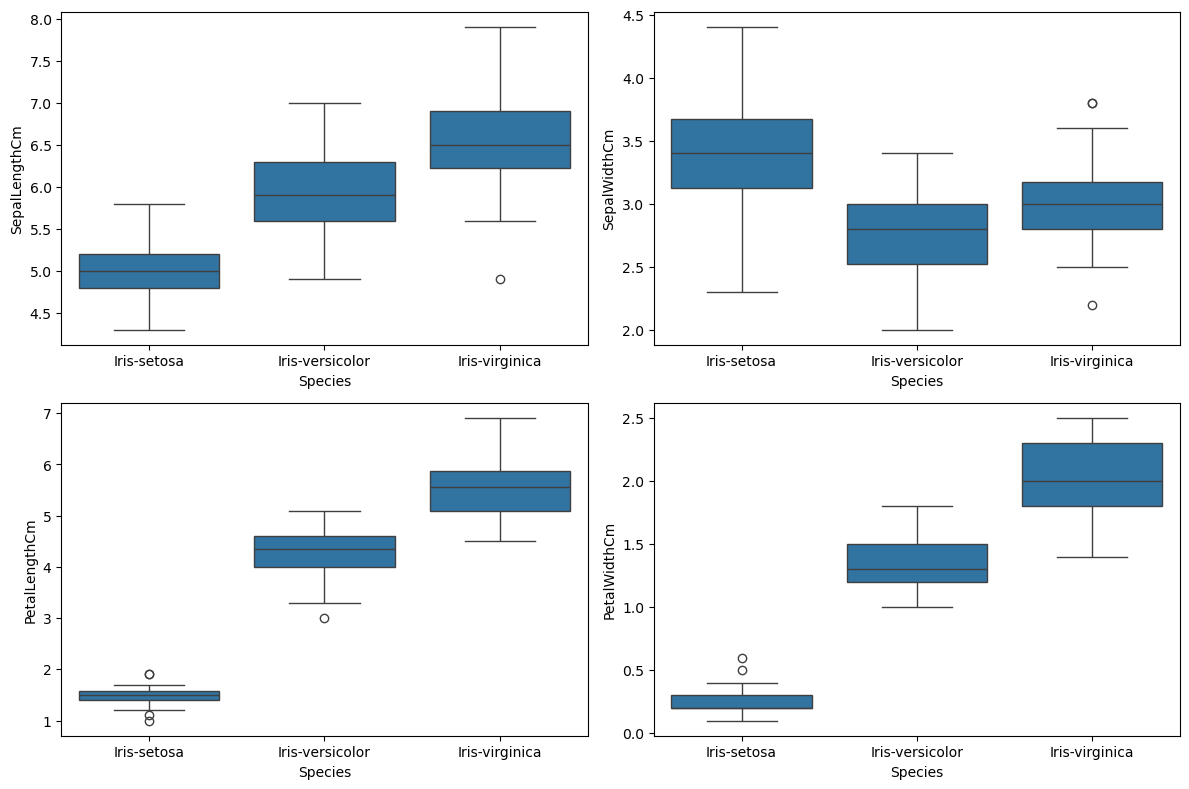

In [9]:
# 🪞 Boxplots by species
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(12,8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Species', y=feature)
plt.tight_layout()
plt.show()

In [10]:
# 🧹 Preprocessing: Prepare data for training
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# ⚙️ Train SVM (Linear Kernel)
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)

In [12]:
# 📊 Evaluate Linear SVM
print("🔹 Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nConfusion Matrix (Linear):\n", confusion_matrix(y_test, y_pred_linear))
print("\nClassification Report (Linear):\n", classification_report(y_test, y_pred_linear))

🔹 Linear SVM Accuracy: 1.0

Confusion Matrix (Linear):
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification Report (Linear):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [13]:
# ⚙️ Train SVM (RBF Kernel)
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

In [14]:
# 📊 Evaluate RBF SVM
print("🔹 RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nConfusion Matrix (RBF):\n", confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report (RBF):\n", classification_report(y_test, y_pred_rbf))

🔹 RBF SVM Accuracy: 0.9666666666666667

Confusion Matrix (RBF):
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report (RBF):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [15]:
# 📈 Compare both models
models = pd.DataFrame({
    'Model': ['SVM (Linear)', 'SVM (RBF)'],
    'Accuracy': [accuracy_score(y_test, y_pred_linear),
                 accuracy_score(y_test, y_pred_rbf)]
})
print(models)

          Model  Accuracy
0  SVM (Linear)  1.000000
1     SVM (RBF)  0.966667


/tmp/ipykernel_15215/826841542.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=models, x='Model', y='Accuracy', palette='viridis')


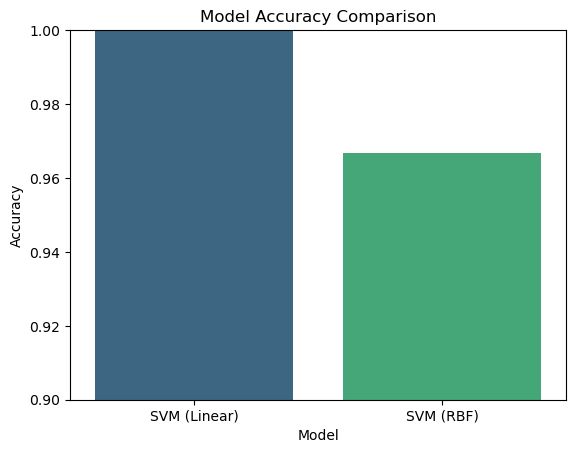

In [16]:
# 📊 Visualize comparison
sns.barplot(data=models, x='Model', y='Accuracy', palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylim(0.9, 1.0)
plt.show()

# Summary
Both Linear and RBF kernels perform very well on the Iris dataset.